<a href="https://colab.research.google.com/github/itzhim/bits-wilp/blob/main/dvi_a2_ps6_wb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
First Semester, 2021-22
</center></h1>

<h2><center>Assignment 2 – PS6 [Weightage 13%]</center></h2>

## Instructions
<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>Submit only the .IPYNB file. Intermediate files to be attached as mentioned in (2).</li>
    <li><b><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready.Most effective visuals would fetch maximum credits</div></b></li>    
    <li><b><div class="alert-warning">Submissions done via means other than CANVAS will strictly be NOT graded.</div></b></li>
    


  
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: (mention your group number here)</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Name 1</td>
    <td>BITS ID 1</td>
  </tr>
  <tr>
    <td>Name 2</td>
    <td>BITS ID 2</td>
  </tr>
  <tr>
    <td>Name 3</td>
    <td>BITS ID 3</td>
  </tr>
</table>

<h1>Objective</h1>
<h4>Analyse the scenario of automobile production in India.</h4>


##  Download and Prep the Data: 1 Mark

<h4>Import the libraries needed</h4>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h4> Load data and store in dataframe </h4>

In [ ]:
data = pd.read_csv("dvi-a2-ps6-data.csv")
df = pd.DataFrame(data)

<h4>Find out  what type of variables you are dealing with. This will help you find the right visualization method for that variable.</p>


In [ ]:
df.dtypes

Category     object
Segment      object
2001-02     float64
2002-03     float64
2003-04     float64
2004-05     float64
2005-06     float64
2006-07       int64
2007-08       int64
2008-09       int64
2009-10       int64
2010-11     float64
2011-12     float64
2012-13     float64
dtype: object

<h4>Perform data cleaning and mention the steps</h4>

In [ ]:
# Step 1: Replace NA values with NaN
df.replace('NA', np.nan, inplace=True)

# Step 2: Impute the missing/NaN values with
# the mean of the corresponding rows
mean = df.mean(axis=1)
for i, col in enumerate(df):
  df.iloc[:, i] = df.iloc[:, i].fillna(mean)

# Step 3: Convert float values to integers
# because yearly sales are whole numbers
for col in df.columns:
  if df[col].dtype == 'float64':
    df[col] = df[col].astype(int)

#df.to_csv("cleaned.csv")

# Step 4: Change year format from 200x-0y to 
# 0x-0y to reduce clutter
df_rename = df.copy(deep=True)
for i in range (2, len(df.columns)):
  df_rename.rename(columns={df_rename.columns[i]:df_rename.columns[i][2:]}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Compare the production of passenger vehicles and commercial vehicles in India from 2001-02 to 2012-13, in a single visual.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    5.Fill in the blanks:<br><br>
    <i>1.In percentage terms, the total growth recorded for passenger vehicles is ______ during the period from 2001-02 to 2012-13.</i><br><br>
    <i>2.In percentage terms, the total growth recorded for commercial vehicles is ______ during the period from 2001-02 to 2012-13.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


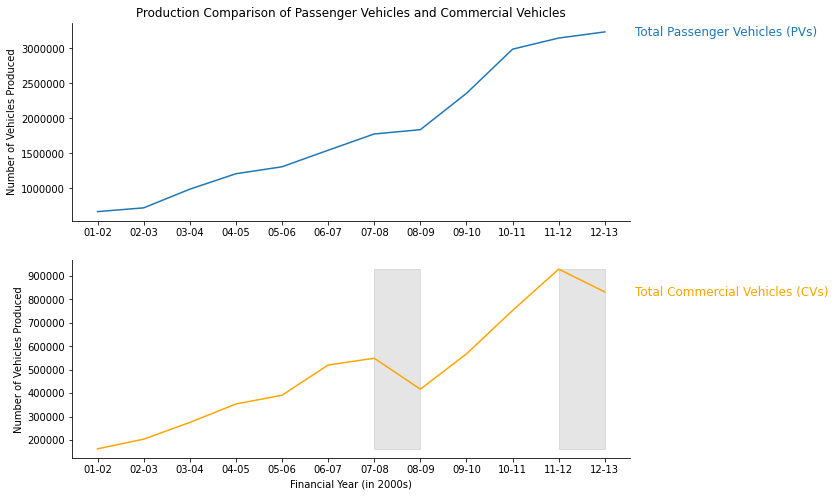

In [ ]:
# Create new data frame consisting of segment only
df_segment = df_rename.drop('Category', 1)
df_segment.set_index('Segment', inplace=True)

# Get list of years
years = df_segment.columns

# Get total number of Passenger and Commercial vehicles produced during each year
pv = df_segment.loc['Total Passenger Vehicles (PVs)', df_segment.columns].values.tolist()
cv = df_segment.loc['Total Commercial Vehicles (CVs)', df_segment.columns].values.tolist()

f = plt.figure(figsize=(10,8))

# Create plot for two wheelers
ax1 = f.add_subplot(211)
ax1.title.set_text('Production Comparison of Passenger Vehicles and Commercial Vehicles')
ax1.ticklabel_format(style='plain')
ax1.plot(years, pv, label='Total Passenger Vehicles (PVs)')

# Hide the right and top borders to reduce clutter
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax1.lines[0].get_ydata()[-1]
ax1.annotate('Total Passenger Vehicles (PVs)', xy=(1,end_pt), xytext=(5,0), color=ax1.lines[0].get_color(), 
                xycoords = ax1.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# Create plot for three wheelers
ax2 = f.add_subplot(212)
ax2.ticklabel_format(style='plain')
ax2.plot(years, cv, color='orange', label='Total Commercial Vehicles (CVs)')

# Using enclosure principle to highlight incline/decline
ax2.fill_betweenx([min(cv),max(cv)],[6],[7],color="C7",alpha=0.2)
ax2.fill_betweenx([min(cv),max(cv)],[10],[11],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax2.lines[0].get_ydata()[-1]
ax2.annotate('Total Commercial Vehicles (CVs)', xy=(1,end_pt-1), xytext=(5,0), color=ax2.lines[0].get_color(), 
                xycoords = ax2.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# We only label the X axis of the bottom-most plot
ax2.set_xlabel('Financial Year (in 2000s)')
ax1.set_ylabel('Number of Vehicles Produced')
ax2.set_ylabel('Number of Vehicles Produced')

plt.show()

In [ ]:
print("In percentage terms, the total growth recorded for passenger vehicles is {:.2f}% during the period from 2001-02 to 2012-13.".format((pv[-1] - pv[0]) / pv[0] * 100))
print("In percentage terms, the total growth recorded for commercial vehicles is {:.2f}% during the period from 2001-02 to 2012-13.".format((cv[-1] - cv[0]) / cv[0] * 100))

In percentage terms, the total growth recorded for passenger vehicles is 382.82% during the period from 2001-02 to 2012-13.
In percentage terms, the total growth recorded for commercial vehicles is 411.82% during the period from 2001-02 to 2012-13.


## Question 1:
####1. Summarise your findings from the visual.<br>
*   Both passenger and commercial vehicles have shown stable growth in production over the period of 12 years.
*   Production of commercial vehicles saw a decline in the years 2008-09 and 2012-13 while passenger vehicles were still showing growth during this time.

####2. The reason for selecting the chart type you did. <br>
*   We have chosen line graph because we have a continuous time series data.
*   Also, for more accurate comparisons we have pulled apart the two graphs for passenger and commercial vehicles to have separate y-axis and have leveraged the same x-axis across both. The reason is that production of passenger vehicles is significantly larger than commercial vehicles. So, keeping them on the same y- axis would undermine the growth shown by production of commercial vehicles.

####3. Mention the pre-attentive attributes used.(atleast 2)<br>
1. Color - For line colors and grey highlight boxes
2. Position - Placing the label of a line just next to it

####4. Mention the gestalt principles used.(atleast 2)<br>
1. Proximity - Labelled the line directly instead of using legends
2. Connection - Line graph signifies connection of data points of time series data
3. Similarity - Test label of the line is the same color as that of line itself
4. Closure - After removal of top and right borders our graph still looks like a cohesive entity
5. Enclosure - Grey box showing instances when production decreased with respect to previous years

####5. Fill in the blanks:<br>
<i>1. In percentage terms, the total growth recorded for passenger vehicles is 382.82% during the period from 2001-02 to 2012-13.<br>
<i>2. In percentage terms, the total growth recorded for commercial vehicles is 411.82% during the period from 2001-02 to 2012-13.

### Question 2
<h4>Analyse the passenger vehicle production(segment wise) during 2001-02 to 2012-13<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    5.Fill in the blanks.<br>
    
   <i>1.In percentage terms, the growth of production of passenger cars in India was ________ during the period from 2001-02 to 2012-13</i><br><br>
    <i>2.In percentage terms, the growth the production of Multi-Utility Vehicles in India was ________ during the period from 2001-02 to 2012-13.

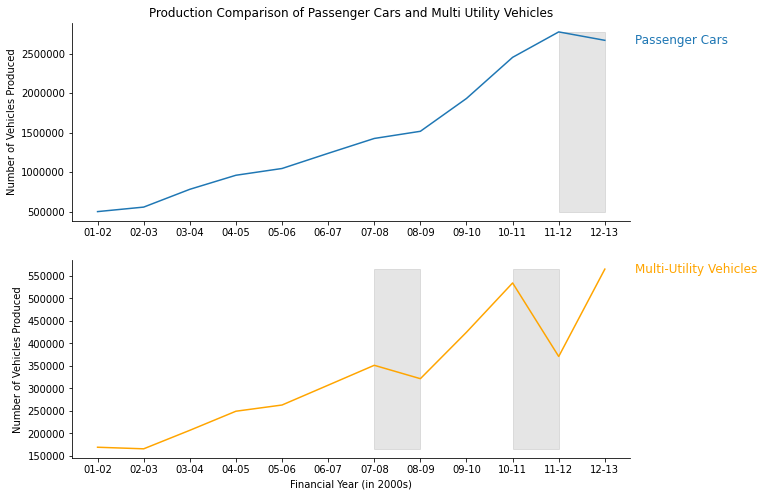

In [ ]:
# Get number of Passenger Cars and Multi-Utility Vehicles produced during each year
pc = df_segment.loc['Passenger Cars', df_segment.columns].values.tolist()
muv = df_segment.loc['Multi-Utility Vehicles', df_segment.columns].values.tolist()

f = plt.figure(figsize=(10,8))

# Create plot for two wheelers
ax1 = f.add_subplot(211)
ax1.title.set_text('Production Comparison of Passenger Cars and Multi Utility Vehicles')
ax1.ticklabel_format(style='plain')
ax1.plot(years, pc, label='Passenger Cars')

# Using enclosure principle to highlight decline
ax1.fill_betweenx([min(pc),max(pc)],[10],[11],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax1.lines[0].get_ydata()[-1]
ax1.annotate('Passenger Cars', xy=(1,end_pt), xytext=(5,0), color=ax1.lines[0].get_color(), 
                xycoords = ax1.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# Create plot for three wheelers
ax2 = f.add_subplot(212)
ax2.ticklabel_format(style='plain')
ax2.plot(years, muv, color='orange', label='Multi-Utility Vehicles')

# Using enclosure principle to highlight decline
ax2.fill_betweenx([min(muv),max(muv)],[6],[7],color="C7",alpha=0.2)
ax2.fill_betweenx([min(muv),max(muv)],[9],[10],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax2.lines[0].get_ydata()[-1]
ax2.annotate('Multi-Utility Vehicles', xy=(1,end_pt-1), xytext=(5,0), color=ax2.lines[0].get_color(), 
                xycoords = ax2.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# We only label the X axis of the bottom-most plot
ax2.set_xlabel('Financial Year (in 2000s)')
ax1.set_ylabel('Number of Vehicles Produced')
ax2.set_ylabel('Number of Vehicles Produced')

plt.show()

In [ ]:
print("In percentage terms, the growth of production of passenger cars in India was {:.2f}% during the period from 2001-02 to 2012-13.".format((pc[-1] - pc[0]) / pc[0] * 100))
print("In percentage terms, the growth of production of Multi-Utility Vehicles in India was {:.2f}% during the period from 2001-02 to 2012-13.".format((muv[-1] - muv[0]) / muv[0] * 100))

In percentage terms, the growth of production of passenger cars in India was 433.41% during the period from 2001-02 to 2012-13.
In percentage terms, the growth of production of Multi-Utility Vehicles in India was 233.45% during the period from 2001-02 to 2012-13.


## Question 2:
####1. Summarise your findings from the visual.<br>
*   Both passenger cars and multi utility vehicles have shown stable growth in production over the period of 12 years.
*   However, production of multi utility vehicles shows a steep decline in the years 2008-09 and 2011-12 while passenger cars showed growth during this time only to have a reduced growth during the year 2012-13.

####2. The reason for selecting the chart type you did. <br>
*   We have chosen line graph because we have a continuous time series data.
*   Also, for more accurate comparisons we have pulled apart the two graphs for passenger cars and multi utility vehicles to have separate y-axis and have leveraged the same x-axis across both. The reason is that production of passenger cars is significantly larger than multi utility vehicles. So, keeping them on the same y-axis would undermine the growth shown by production of multi utility vehicles.

####3. Mention the pre-attentive attributes used.(atleast 2)<br>
1. Color - For line colors and grey highlight boxes
2. Position - Placing the label of a line just next to it

####4. Mention the gestalt principles used.(atleast 2)<br>
1. Proximity - Labelled the line directly instead of using legends
2. Connection - Line graph signifies connection of data points of time series data
3. Similarity - Test label of the line is the same color as that of line itself
4. Closure - After removal of top and right borders our graph still looks like a cohesive entity
5. Enclosure - Grey box showing instances when production decreased with respect to previous years

5.Fill in the blanks:<br>
    <i>1. In percentage terms, the total growth recorded for passenger vehicles is 433.41% during the period from 2001-02 to 2012-13.</i><br>
    <i>2. In percentage terms, the total growth recorded for commercial vehicles is 233.45% during the period from 2001-02 to 2012-13.

### Question 3
<h4>Compare the production of 2 wheeler and three wheelers in India from 2001-02 to 2012-13, in a single visual.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

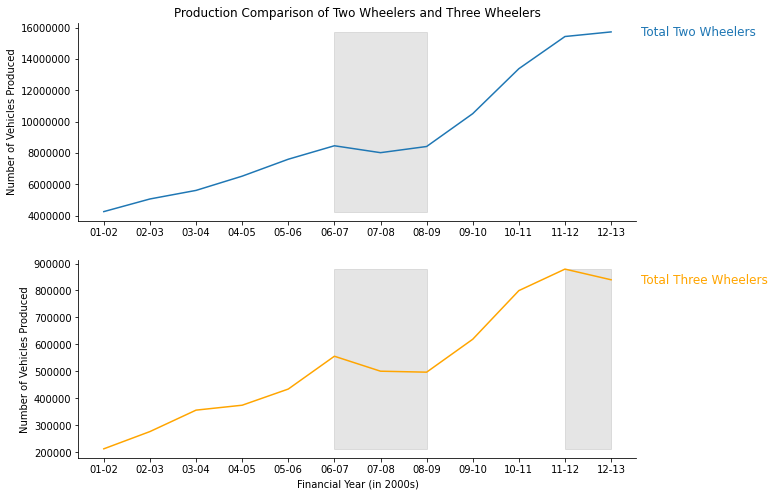

In [ ]:
# Get total number of Two Wheelers and Three Wheelers produced during each year
two_w = df_segment.loc['Total Two wheelers', df_segment.columns].values.tolist()
three_w = df_segment.loc['Total Three Wheelers', df_segment.columns].values.tolist()

f = plt.figure(figsize=(10,8))

# Create plot for two wheelers
ax1 = f.add_subplot(211)
ax1.title.set_text('Production Comparison of Two Wheelers and Three Wheelers')
ax1.ticklabel_format(style='plain')
ax1.plot(years, two_w, label='Total Two wheelers')

# Using enclosure principle to highlight decline
ax1.fill_betweenx([min(two_w),max(two_w)],[5],[7],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax1.lines[0].get_ydata()[-1]
ax1.annotate('Total Two Wheelers', xy=(1,end_pt), xytext=(5,0), color=ax1.lines[0].get_color(), 
                xycoords = ax1.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# Create plot for three wheelers
ax2 = f.add_subplot(212)
ax2.ticklabel_format(style='plain')
ax2.plot(years, three_w, color='orange', label='Total Three Wheelers')

# Using enclosure principle to highlight decline
ax2.fill_betweenx([min(three_w),max(three_w)],[5],[7],color="C7",alpha=0.2)
ax2.fill_betweenx([min(three_w),max(three_w)],[10],[11],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax2.lines[0].get_ydata()[-1]
ax2.annotate('Total Three Wheelers', xy=(1,end_pt-1), xytext=(5,0), color=ax2.lines[0].get_color(), 
                xycoords = ax2.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# We only label the X axis of the bottom-most plot
ax2.set_xlabel('Financial Year (in 2000s)')
ax1.set_ylabel('Number of Vehicles Produced')
ax2.set_ylabel('Number of Vehicles Produced')

plt.show()

## Question 3:
####1. Summarise your findings from the visual.<br>
*   The two and three wheeler vehicles have shown stable growth in production over the period of 12 years.
*   Both two and three wheelers had a rough patch between the years 2007-09 as during these 2 years their production decreased.
*   However, both of them picked up pace again in 2009-10 and continued to grow till 2012. In 2012-2013, two wheelers showed only a marginal growth while three wheelers again showed a decline in production.

####2. The reason for selecting the chart type you did. <br>
*   We have chosen line graph because we have a continuous time series data.
*   Also, for more accurate comparisons we have pulled apart the two graphs for two wheelers and three wheelers to have separate y-axis and have leveraged the same x-axis across both. The reason is that production of three wheelers is significantly larger than two wheelers. So, keeping them on the same y-axis would undermine the growth shown by production of three wheelers.

####3. Mention the pre-attentive attributes used.(atleast 2)<br>
1. Color - For line colors and grey highlight boxes
2. Position - Placing the label of a line just next to it

####4. Mention the gestalt principles used.(atleast 2)<br>
1. Proximity - Labelled the line directly instead of using legends
2. Connection - Line graph signifies connection of data points of time series data
3. Similarity - Test label of the line is the same color as that of line itself
4. Closure - After removal of top and right borders our graph still looks like a cohesive entity
5. Enclosure - Grey box showing instances when production decreased with respect to previous years

### Question 4
<h4>Analyse the two wheeler production in India(segment wise) during 2001-02 to 2012-13.<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

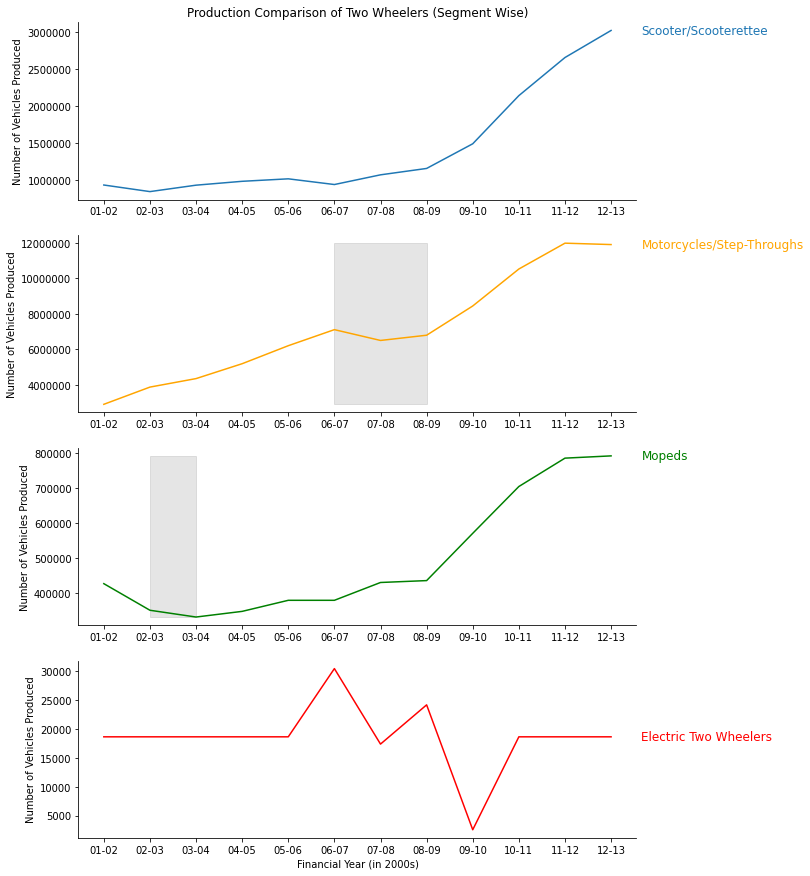

In [ ]:
# Get number of different types of Two Wheelers produced during each year
scooter = df_segment.loc['Scooter/Scooterettee', df_segment.columns].values.tolist()
motorcycle = df_segment.loc['Motorcycles/Step-Throughs', df_segment.columns].values.tolist()
moped = df_segment.loc['Mopeds', df_segment.columns].values.tolist()
electric = df_segment.loc['Electric Two Wheelers', df_segment.columns].values.tolist()

f = plt.figure(figsize=(10,15))

# Create plot for scooters
ax1 = f.add_subplot(411)
ax1.title.set_text('Production Comparison of Two Wheelers (Segment Wise)')
ax1.ticklabel_format(style='plain')
ax1.plot(years, scooter, label='Scooter/Scooterettee')

# Hide the right and top borders to reduce clutter
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax1.lines[0].get_ydata()[-1]
ax1.annotate('Scooter/Scooterettee', xy=(1,end_pt), xytext=(5,0), color=ax1.lines[0].get_color(), 
                xycoords = ax1.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# Create plot for motorcycles
ax2 = f.add_subplot(412)
ax2.ticklabel_format(style='plain')
ax2.plot(years, motorcycle, color='orange', label='Motorcycles/Step-Throughs')

# Using enclosure principle to highlight decline
ax2.fill_betweenx([min(motorcycle),max(motorcycle)],[5],[7],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax2.lines[0].get_ydata()[-1]
ax2.annotate('Motorcycles/Step-Throughs', xy=(1,end_pt-1), xytext=(5,0), color=ax2.lines[0].get_color(), 
                xycoords = ax2.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# Create plot for mopeds
ax3 = f.add_subplot(413)
ax3.ticklabel_format(style='plain')
ax3.plot(years, moped, color='green', label='Mopeds')

# Using enclosure principle to highlight decline
ax3.fill_betweenx([min(moped),max(moped)],[1],[2],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax3.lines[0].get_ydata()[-1]
ax3.annotate('Mopeds', xy=(1,end_pt-1), xytext=(5,0), color=ax3.lines[0].get_color(), 
                xycoords = ax3.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# Create plot for electric two wheelers
ax4 = f.add_subplot(414)
ax4.ticklabel_format(style='plain')
ax4.plot(years, electric, color='red', label='Total Electric Two Wheelers')

# Hide the right and top borders to reduce clutter
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax4.lines[0].get_ydata()[-1]
ax4.annotate('Electric Two Wheelers', xy=(1,end_pt-1), xytext=(5,0), color=ax4.lines[0].get_color(), 
                xycoords = ax4.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# We only label the X axis of the bottom-most plot
ax4.set_xlabel('Financial Year (in 2000s)')
ax1.set_ylabel('Number of Vehicles Produced')
ax2.set_ylabel('Number of Vehicles Produced')
ax3.set_ylabel('Number of Vehicles Produced')
ax4.set_ylabel('Number of Vehicles Produced')

plt.show()

## Question 4:
####1. Summarise your findings from the visual.<br>
*   All the 4 segments of two wheelers vehicles have stable growth in production over the period of 12 years.
*   From the year 2008 onwards, both scooters and mopeds showed significant growth as compared to previous years when the production was somewhat constant.
*   On the other hand, motorcycles started showing growth from 2001 itself. However, they had a little rough patch between 2006-08 when the production declined for the 2 years.
*   For electric two wheelers, the data wasn't available before the year 2005 probably because of the fact that they wouldn't been introduced to the world yet. Hence, we have taken the mean of production numbers during those years. This isn't reflective of how the actual production of electric two wheelers fared before 2005. Even during the years 2006-10, their production has shown increase and decrease every now and then.

####2. The reason for selecting the chart type you did. <br>
*   We have chosen line graph because we have a continuous time series data.
*   Also, for more accurate comparisons we have pulled apart the four graphs for scooters, motorcycles, mopeds and electric two wheelers to have separate y-axis and have leveraged the same x-axis across both. The reason is that each of the 4 segments have significantly different production numbers. Especially, scooters and motorcycles numbers are much greater. So, keeping them on the same y-axis would undermine the growth shown each of them.

####3. Mention the pre-attentive attributes used.(atleast 2)<br>
1. Color - For line colors and grey highlight boxes
2. Position - Placing the label of a line just next to it

####4. Mention the gestalt principles used.(atleast 2)<br>
1. Proximity - Labelled the line directly instead of using legends
2. Connection - Line graph signifies connection of data points of time series data
3. Similarity - Test label of the line is the same color as that of line itself
4. Closure - After removal of top and right borders our graph still looks like a cohesive entity
5. Enclosure - Grey box showing instances when production decreased with respect to previous years

### Question 5

<h4>Analyse the three wheeler production in India(segment wise) during 2001-02 to 2012-13.<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


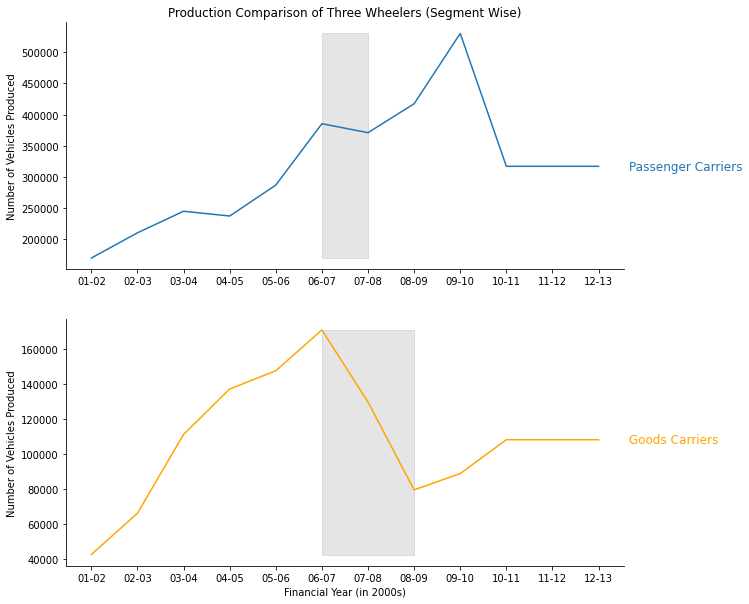

In [ ]:
df_temp = df_rename.loc[10:12]
df_temp.set_index('Segment', inplace=True)
df_three = df_temp.drop('Category', 1)

# Get number of different types of Three Wheelers produced during each year
passenger = df_three.loc['Passenger Carriers', df_three.columns].values.tolist()
goods = df_three.loc['Goods Carriers', df_three.columns].values.tolist()

f = plt.figure(figsize=(10,10))

# Create plot for passenger carriers
ax1 = f.add_subplot(211)
ax1.title.set_text('Production Comparison of Three Wheelers (Segment Wise)')
ax1.ticklabel_format(style='plain')
ax1.plot(years, passenger, label='Passenger Carriers')

# Using enclosure principle to highlight decline
ax1.fill_betweenx([min(passenger),max(passenger)],[5],[6],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax1.lines[0].get_ydata()[-1]
ax1.annotate('Passenger Carriers', xy=(1,end_pt), xytext=(5,0), color=ax1.lines[0].get_color(), 
                xycoords = ax1.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# Create plot for goods carriers
ax2 = f.add_subplot(212)
ax2.ticklabel_format(style='plain')
ax2.plot(years, goods, color='orange', label='Goods Carriers')

# Using enclosure principle to highlight decline
ax2.fill_betweenx([min(goods),max(goods)],[5],[7],color="C7",alpha=0.2)

# Hide the right and top borders to reduce clutter
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Annotate the lines (proximity, similarity principle)
end_pt = ax2.lines[0].get_ydata()[-1]
ax2.annotate('Goods Carriers', xy=(1,end_pt-1), xytext=(5,0), color=ax2.lines[0].get_color(), 
                xycoords = ax2.get_yaxis_transform(), textcoords="offset points",
                size=12, va="center")

# We only label the X axis of the bottom-most plot
ax2.set_xlabel('Financial Year (in 2000s)')
ax1.set_ylabel('Number of Vehicles Produced')
ax2.set_ylabel('Number of Vehicles Produced')

plt.show()

## Question 5:
####1. Summarise your findings from the visual.<br>
*   Both passenger carriers and goods carriers have shown growth in production over the period of 12 years.
*   Production of goods carriers showed a steep decline during the years 2007-09 but increased their production from 2009 onwards.
*   Note that the plot showing a steep decline for passenger carriers from 2010 onwards is only due to the fact that data was unavailable after this time.Hence, we have taken the mean of production numbers during previous years. This isn't reflective of how the actual production of passenger carriers fared after the year 2010.

####2. The reason for selecting the chart type you did. <br>
*   We have chosen line graph because we have a continuous time series data.
*   Also, for more accurate comparisons we have pulled apart the two graphs for passenger carriers and goods carriers to have separate y-axis and have leveraged the same x-axis across both. The reason is that production of passenger carriers is significantly larger than goods carriers. So, keeping them on the same y-axis would undermine the growth shown by production of goods carriers.

####3. Mention the pre-attentive attributes used.(atleast 2)<br>
1. Color - For line colors and grey highlight boxes
2. Position - Placing the label of a line just next to it

####4. Mention the gestalt principles used.(atleast 2)<br>
1. Proximity - Labelled the line directly instead of using legends
2. Connection - Line graph signifies connection of data points of time series data
3. Similarity - Test label of the line is the same color as that of line itself
4. Closure - After removal of top and right borders our graph still looks like a cohesive entity
5. Enclosure - Grey box showing instances when production decreased with respect to previous years

 # Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did. <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>